In [16]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('./bot1.txt')
df['profit'] = df['balance'] - df['position'] * df['price']
print(df.head(30))

    position  balance     price    profit
0         -1   0.0000  226.8457  226.8457
1          4 -10.6308  226.0146 -914.6892
2          3  -6.8324  226.9642 -687.7250
3          2  -1.7378  228.6624 -459.0626
4          1  -5.8176  226.6225 -232.4401
5          1  -4.5993  227.2745 -231.8738
6          0  -3.7318  228.1420   -3.7318
7         -1  -3.7318  228.1435  224.4117
8         -2  -3.7634  228.1751  452.5868
9         -1  -2.2221  227.1644  224.9423
10         0  -1.3742  228.6874   -1.3742
11        -1  -1.3742  226.3807  225.0065
12         0  -3.4997  227.2762   -3.4997
13        -1  -3.4997  227.1678  223.6681
14        -2  -4.4656  228.1337  451.8018
15        -3  -1.9978  226.8998  678.7016
16        -4  -0.4765  226.3927  905.0943
17        -3  -0.5148  225.9783  677.4201
18         3  -7.8170  226.9362 -688.6256
19         2  -6.7811  227.2815 -461.3441
20         1  -5.0767  228.1337 -233.2104
21         1  -6.8716  226.5373 -233.4089
22         1  -5.3347  228.1071 -2

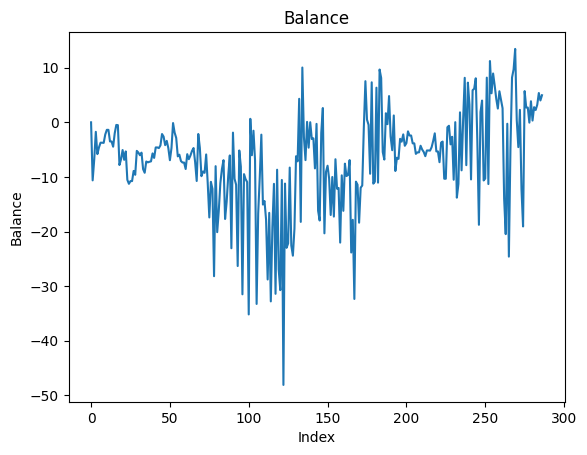

In [18]:
df['balance'].plot(title='Balance', xlabel='Index', ylabel='Balance')
plt.show()

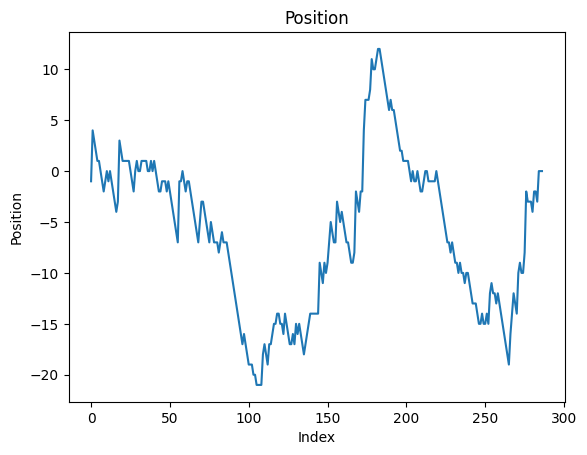

In [19]:
df['position'].plot(title='Position', xlabel='Index', ylabel='Position')
plt.show()

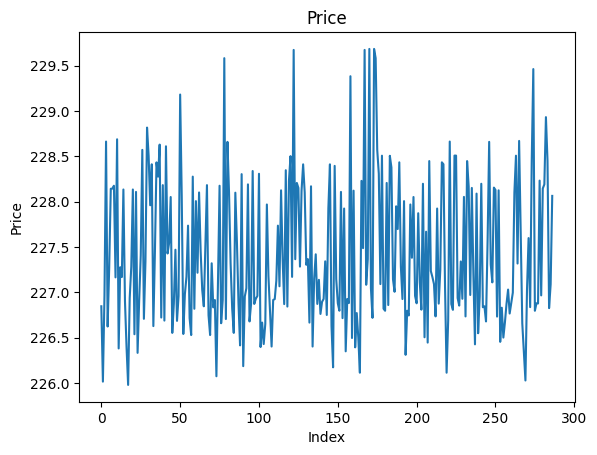

In [20]:
df['price'].plot(title='Price', xlabel='Index', ylabel='Price')
plt.show()

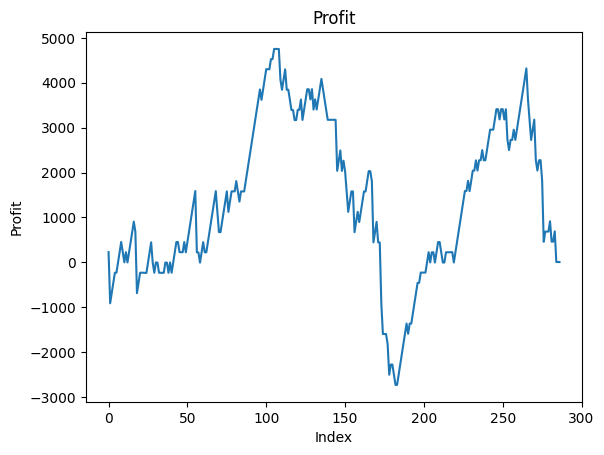

In [21]:
df['profit'].plot(title='Profit', xlabel='Index', ylabel='Profit')
plt.show()